In [1]:
# import some general scientific Python libraries
import matplotlib.pyplot as plt
#from matplotlib import tri
import numpy as np

# import required PyRockWave modules
import elastic_database as edb
import orthotropic_models as om
import coordinates as c

Mineral Elastic Database v.2024.2.01 imported


In [2]:
olivine = edb.forsterite_Mao()
olivine

<class 'ElasticClass.ElasticProps'>

Mineral Name: Forsterite
Reference Source: https://doi.org/10.1016/j.epsl.2015.06.045
Crystal System: Orthorhombic
Pressure (GPa): 0.0
Temperature (°C): 627
Density (g/cm3): 3.246

Elastic Tensor (Cij) in GPa:
[[296.02  38.36  58.15   0.     0.     0.  ]
 [ 38.36 179.72  75.03   0.     0.     0.  ]
 [ 58.15  75.03 210.01   0.     0.     0.  ]
 [  0.     0.     0.    56.42   0.     0.  ]
 [  0.     0.     0.     0.    71.04   0.  ]
 [  0.     0.     0.     0.     0.    71.01]]

Tensor decomposition (Browaeys & Chevrot approach):
    Isotropy = 73.6 %
    Anisotropy = 26.4 %

Anisotropy indexes:
    Universal Elastic Anisotropy:           0.342
    Kube's Anisotropy Index (proportional): 0.139

Calculated elastic average properties:
Unit:GPa  Bulk_modulus  Shear_modulus  Poisson_ratio
   Voigt       114.314         73.975          0.234
    Hill       112.838         71.777          0.238
   Reuss       111.361         69.579          0.241

Isotropic

In [3]:
# generate a set of wavevectors
wavevectors = c.equispaced_S2_grid(n=60000, hemisphere='upper')

In [4]:
model = om.orthotropic_azimuthal_anisotropy(olivine, wavevectors)

model

,polar_ang,azimuthal_ang,Vp
0,0.000000,0.000000,8.043512
1,0.028863,0.000000,8.122328
2,0.029435,3.883222,8.118228
3,0.029995,1.483259,8.093394
4,0.030546,5.366481,8.115295
...,...,...,...
59995,1.570721,2.080495,8.521190
59996,1.570738,5.963717,9.542909
59997,1.570755,3.563754,9.516389
59998,1.570771,1.163791,8.233013


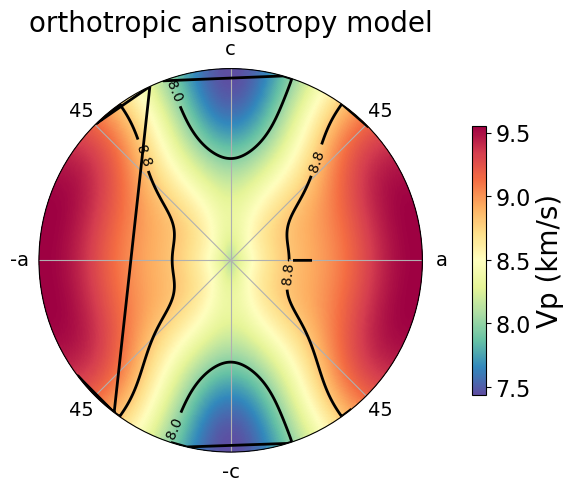

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True)

ax.set_theta_direction(-1)
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax.set_xticklabels(['a', '45', '-c', '45', '-a', '45', 'c', '45'], fontsize=14)
ax.set_yticks([])
ax.set_title('orthotropic anisotropy model', fontsize=20)

cm = ax.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# rough contour (artifact, see https://github.com/matplotlib/matplotlib/issues/19492)
cs = ax.tricontour(model['azimuthal_ang'],
                   model['polar_ang'],
                   model['Vp'],
                   levels=2,
                   linestyles="solid", colors="k", linewidths=2.0)
_ =ax.clabel(cs, cs.levels, inline=True, fontsize=10)